In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0                 # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0.5               # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0.5               # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0                 # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_error(p_d, eta, mu):
    case2_approx = (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_2 = np.abs(case2_actual - case2_approx)
    return error_2

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_error(p_d, eta, mu):
    case3_approx = (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_3 = np.abs(case3_actual - case3_approx)
    return error_3

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_error(p_d, eta, mu):
    case4_approx = (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    error_4 = np.abs(case4_actual - case4_approx)
    return error_4

In [7]:
# Error bound based on varying dark count probability
error_2_PD = []
error_3_PD = []
error_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    error_2_PD.append(case_2_error(p_d, ETA, MU))
    error_3_PD.append(case_3_error(p_d, ETA, MU))
    error_4_PD.append(case_4_error(p_d, ETA, MU))
print(error_2_PD)
print(error_3_PD)
print(error_4_PD)

[3.8621343872129603e-07, 5.830819544781272e-07, 7.791594914629329e-07, 9.744472402813469e-07, 1.1689463915389952e-06, 1.362658135841545e-06, 1.5555836637945767e-06, 1.7477241660037693e-06, 1.939080833074727e-06, 2.129654855613115e-06, 2.319447424224463e-06, 2.508459729514545e-06, 2.696692962088945e-06, 2.8841483125533005e-06, 3.070826971513169e-06, 3.2567301295742426e-06, 3.441858977342241e-06, 3.626214705422558e-06, 3.809798504421076e-06, 3.992611564943352e-06, 4.174655077594834e-06, 4.355930232981622e-06, 4.536438221708892e-06, 4.716180234382418e-06, 4.895157461607975e-06, 5.073371093990793e-06, 5.25082232213708e-06, 5.42751233665185e-06, 5.603442328141529e-06, 5.778613487211022e-06, 5.953027004465669e-06, 6.126684070512653e-06, 6.299585875955797e-06, 6.471733611402176e-06, 6.643128467456912e-06, 6.813771634724911e-06, 6.983664303812599e-06, 7.152807665325098e-06, 7.321202909868832e-06, 7.488851228048925e-06, 7.6557538104705e-06, 7.821911847740847e-06, 7.987326530464007e-06, 8.151999

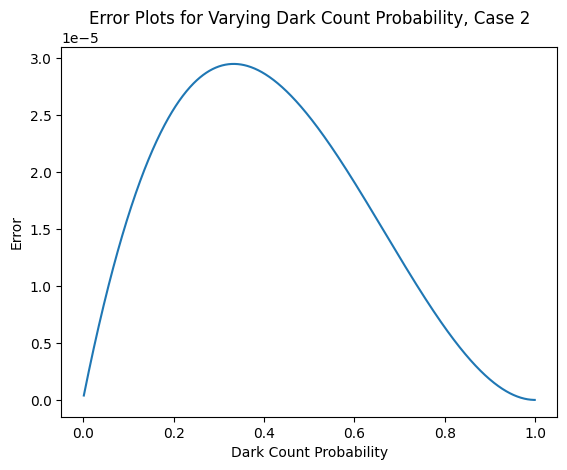

In [8]:
plt.plot(range_PD, error_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 2')
plt.savefig("error_2_PD_2.png")
plt.show()

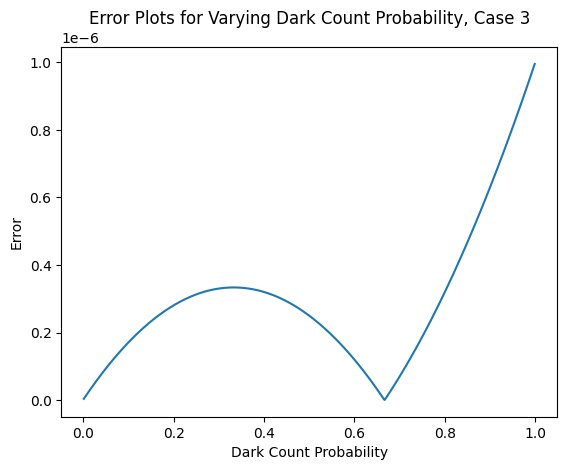

In [9]:
plt.plot(range_PD, error_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 3')
plt.savefig("error_3_PD_2.png")
plt.show()

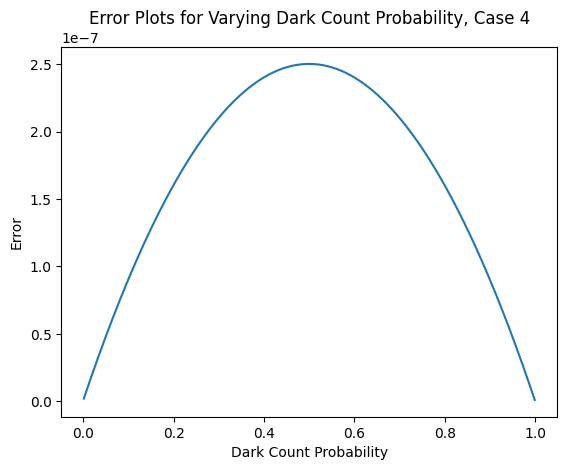

In [10]:
plt.plot(range_PD, error_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 4')
plt.savefig("error_4_PD_2.png")
plt.show()

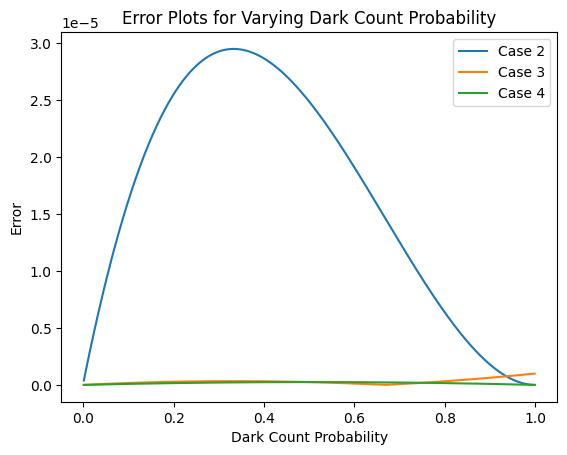

In [11]:
# Plot error bound based on varying dark count probability
plt.plot(range_PD, error_2_PD, label = 'Case 2')
plt.plot(range_PD, error_3_PD, label = 'Case 3')
plt.plot(range_PD, error_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("error_PD_2.png")
plt.show()
# plt.close()

In [12]:
# Error bound based on varying detector efficiency
error_2_eta = []
error_3_eta = []
error_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    error_2_eta.append(case_2_error(P_D, eta, MU))
    error_3_eta.append(case_3_error(P_D, eta, MU))
    error_4_eta.append(case_4_error(P_D, eta, MU))
print(error_2_eta)
print(error_3_eta)
print(error_4_eta)

[2.1879400495487852e-13, 1.6699126011946172e-12, 5.54357182702416e-12, 1.3027469761851399e-11, 2.5306787129166037e-11, 4.3564187899066766e-11, 6.897981988933846e-11, 1.0273131536696656e-10, 1.459937916476908e-10, 1.999398516955482e-10, 2.6573958472044735e-10, 3.4456056677709604e-10, 4.375678613610237e-10, 5.459240200051441e-10, 6.707890828738678e-10, 8.1332057935944e-10, 9.746735286743588e-10, 1.1560004404450894e-09, 1.3584513153026672e-09, 1.5831736454762964e-09, 1.8313124153824942e-09, 2.104010102215701e-09, 2.4024066765353208e-09, 2.7276396028569435e-09, 3.08084384023781e-09, 3.463151842864514e-09, 3.875693560636575e-09, 4.319596439755093e-09, 4.795985423304514e-09, 5.305982951837865e-09, 5.850708963956227e-09, 6.431280896895285e-09, 7.0488136871033155e-09, 7.704419770823539e-09, 8.399209084670325e-09, 9.134289066212695e-09, 9.91076465454948e-09, 1.072973829088773e-08, 1.1592309919116931e-08, 1.249957698638838e-08, 1.3452634443687773e-08, 1.4452574746410456e-08, 1.5500487854931893e-

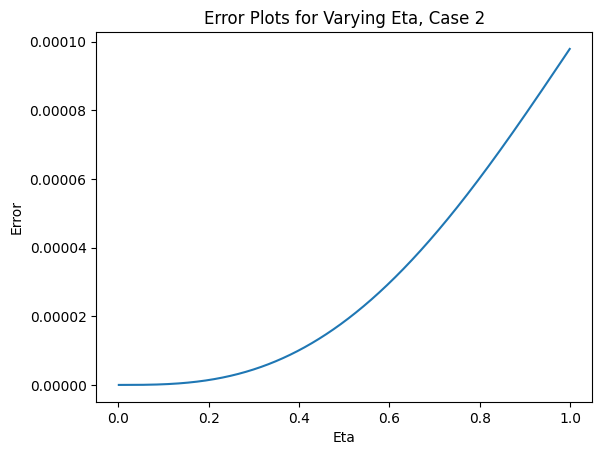

In [13]:
plt.plot(range_eta, error_2_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 2')
plt.savefig("error_2_eta_2.png")
plt.show()

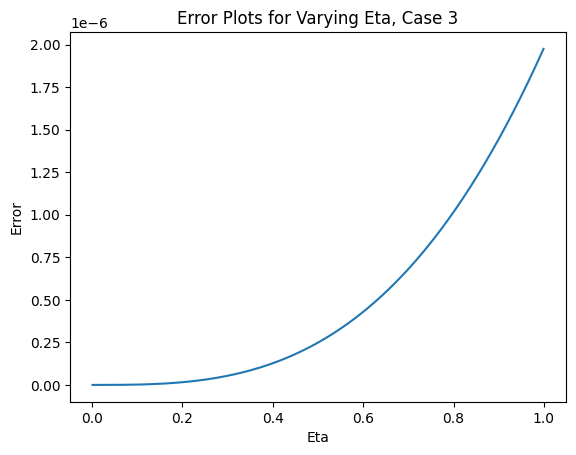

In [14]:
plt.plot(range_eta, error_3_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 3')
plt.savefig("error_3_eta_2.png")
plt.show()

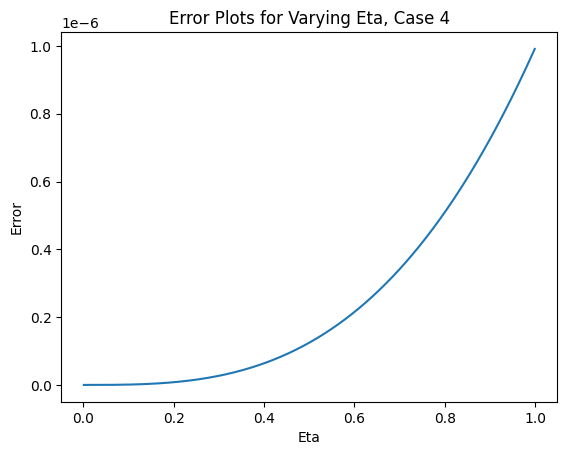

In [15]:
plt.plot(range_eta, error_4_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 4')
plt.savefig("error_4_eta_2.png")
plt.show()

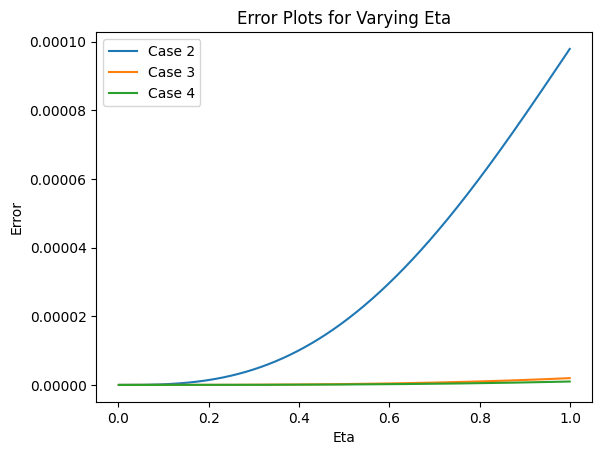

In [16]:
# Plot error bound based on varying detector efficiency
plt.plot(range_eta, error_2_eta, label = 'Case 2')
plt.plot(range_eta, error_3_eta, label = 'Case 3')
plt.plot(range_eta, error_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta')
plt.legend()
plt.savefig("error_eta_2.png")
plt.show()
# plt.close()

In [17]:
# Error bound based on varying mean number of photons detected on some time interval
error_2_mu = []
error_3_mu = []
error_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    error_2_mu.append(case_2_error(P_D, ETA, mu))
    error_3_mu.append(case_3_error(P_D, ETA, mu))
    error_4_mu.append(case_4_error(P_D, ETA, mu))
print(error_2_mu)
print(error_3_mu)
print(error_4_mu)

[4.848137543969125e-10, 1.9185298430782026e-09, 4.300060866996347e-09, 7.628319990566048e-09, 1.1902220941450843e-08, 1.7120678010349785e-08, 2.328260605078415e-08, 3.038692047888447e-08, 3.843253727317739e-08, 4.741837297437218e-08, 5.7343344685148715e-08, 6.820637006994365e-08, 8.000636735473808e-08, 9.274225532684508e-08, 1.064129533346961e-07, 1.2101738128762913e-07, 1.365544596556762e-07, 1.530231094693503e-07, 1.7042225231943352e-07, 1.8875081035676347e-07, 2.0800770629202494e-07, 2.2819186339553052e-07, 2.4930220549701664e-07, 2.7133765698542464e-07, 2.9429714280869464e-07, 3.1817958847354695e-07, 3.42983920045278e-07, 3.687090641475411e-07, 3.953539479621394e-07, 4.229174992288148e-07, 4.513986462450301e-07, 4.807963178657657e-07, 5.111094435033033e-07, 5.42336953127013e-07, 5.74477777263151e-07, 6.075308469946327e-07, 6.414950939608369e-07, 6.763694503573864e-07, 7.121528489359398e-07, 7.48844223003978e-07, 7.864425064245994e-07, 8.249466336162978e-07, 8.643555395527609e-07, 9

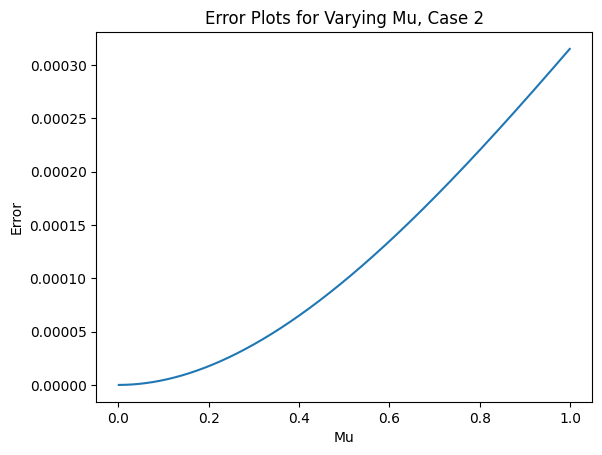

In [18]:
plt.plot(range_mu, error_2_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 2')
plt.savefig("error_2_mu_2.png")
plt.show()

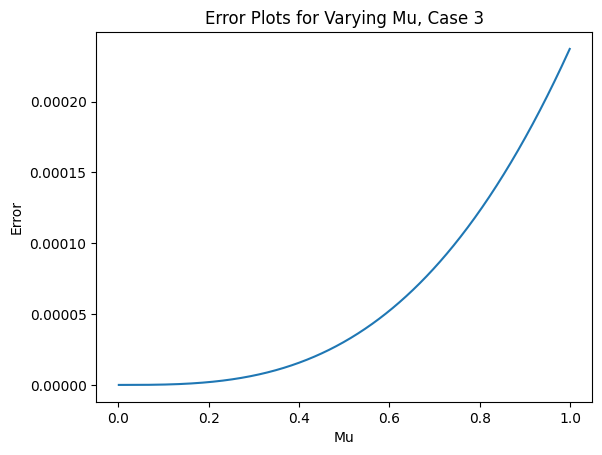

In [19]:
plt.plot(range_mu, error_3_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 3')
plt.savefig("error_3_mu_2.png")
plt.show()

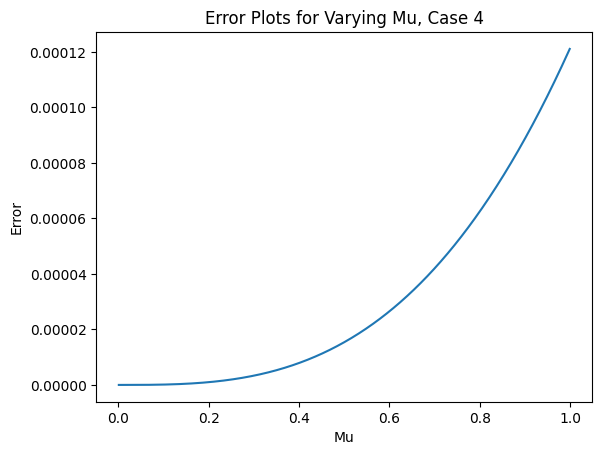

In [20]:
plt.plot(range_mu, error_4_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 4')
plt.savefig("error_4_mu_2.png")
plt.show()

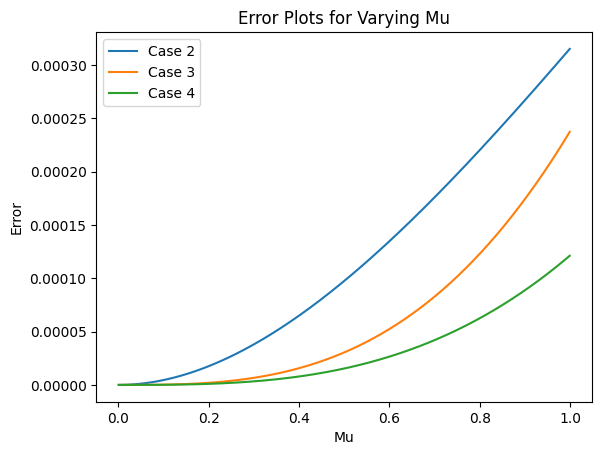

In [21]:
# Plot fidelities based on varying mean number of photons detected on some time interval
plt.plot(range_mu, error_2_mu, label = 'Case 2')
plt.plot(range_mu, error_3_mu, label = 'Case 3')
plt.plot(range_mu, error_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu')
plt.legend()
plt.savefig("error_mu_2.png")
plt.show()
# plt.close()